## UML Project : Data EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re
from textwrap import wrap

In [3]:
#Importing data for comic books

books_comic = pd.read_csv("./data/top_1000_books.csv")
interactions_comic = pd.read_csv("./data/top_1000_books_interactions.csv")
reviews_comic = pd.read_csv("./data/top_1000_books_reviews.csv")

In [3]:
#Importing books data for all genres except comic

books_children = pd.read_csv("./data/goodreads_books_children.csv")
books_fp = pd.read_csv("./data/goodreads_books_fantasy_paranormal.csv")
books_hb = pd.read_csv("./data/goodreads_books_history_biography.csv")
books_mys = pd.read_csv("./data/goodreads_books_mystery_thriller_crime.csv")
books_po = pd.read_csv("./data/goodreads_books_poetry.csv")
books_rom = pd.read_csv("./data/goodreads_books_romance.csv")

In [95]:
#Importing data for comic books

books_comic_all = pd.read_csv("./data/Project/Data/books_comic.csv")
reviews_comic_all = pd.read_csv("./data/review_comic.csv")

In [6]:
books_comic.shape

(1000, 30)

In [7]:
interactions_comic.shape

(2396877, 12)

In [8]:
reviews_comic.shape

(146970, 12)

In [9]:
books_children.shape

(124082, 30)

In [10]:
books_fp.shape

(258585, 30)

In [11]:
books_hb.shape

(302935, 30)

In [12]:
books_mys.shape

(219235, 30)

In [13]:
books_po.shape

(36514, 30)

In [14]:
books_rom.shape

(335449, 30)

In [21]:
books_comic_all.shape

(89411, 30)

In [22]:
reviews_comic_all.shape

(542338, 12)

##### EDA 1 - Across genres

###### Find the number of books across genres


In [23]:
df_com = pd.DataFrame([['Comic', books_comic_all.shape[0]]], columns = ['genre', 'n_books'])

In [24]:
df_ch = pd.DataFrame([['Children', books_children.shape[0]]], columns = ['genre', 'n_books'])

In [25]:
df_fp = pd.DataFrame([['Fantasy Paranormal', books_fp.shape[0]]], columns = ['genre', 'n_books'])

In [26]:
df_hb = pd.DataFrame([['History Biography', books_hb.shape[0]]], columns = ['genre', 'n_books'])

In [27]:
df_mys = pd.DataFrame([['Mystery Thriller Crime', books_hb.shape[0]]], columns = ['genre', 'n_books'])

In [28]:
df_po = pd.DataFrame([['Poetry', books_po.shape[0]]], columns = ['genre', 'n_books'])

In [29]:
df_rom = pd.DataFrame([['Romance', books_rom.shape[0]]], columns = ['genre', 'n_books'])

In [30]:
df_all = df_com.append(df_ch, ignore_index = True)

In [31]:
df_all = df_all.append(df_fp, ignore_index = True)

In [32]:
df_all = df_all.append(df_hb, ignore_index = True)

In [33]:
df_all = df_all.append(df_mys, ignore_index = True)

In [34]:
df_all = df_all.append(df_po, ignore_index = True)

In [35]:
df_all = df_all.append(df_rom, ignore_index = True)

In [36]:
df_all

,genre,n_books
0,Comic,89411
1,Children,124082
2,Fantasy Paranormal,258585
3,History Biography,302935
4,Mystery Thriller Crime,302935
5,Poetry,36514
6,Romance,335449


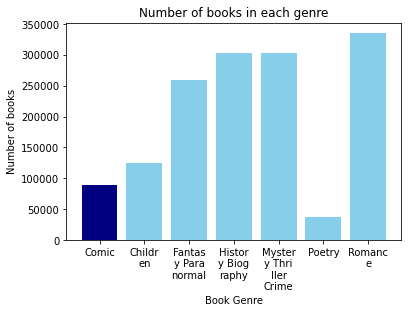

In [37]:
colors = ["skyblue" if i != "Comic" else "navy" for i in df_all['genre']]
plt.bar(df_all['genre'], df_all['n_books'], color = colors)
labels = ['\n'.join(wrap(x, 6)) for x in  df_all['genre']]
plt.xlabel("Book Genre")
plt.ylabel("Number of books")
plt.title("Number of books in each genre")
plt.xticks([0,1,2,3,4,5,6], labels)
plt.show()

#### Comic Dataset

##### EDA 2 - Number of books in prominent shelves 

In [4]:
#Converting the jason object columns to desired format - popular_shelves

books_comic['popular_shelves'] = books_comic.popular_shelves.apply(lambda x: re.sub("\'", '\"', x))
books_comic['popular_shelves'] = books_comic.popular_shelves.apply(lambda x: json.loads(x, strict = False))

In [5]:
#Removing names of shelves that are not genres

keyValList = ['to-read', 'currently-reading', 'favorites', 'owned', 'i-own', 'to-buy', 'favourites', 'wish-list', 'default', 'my-books', 'alan-moore', 'borrowed',
'my-library', 'book-club', 'other', 'read-in-2013', 'books-i-own', 'library', 'owned-books', 'manga-read', 'read-for-school', 'read-2014', 'scott-pilgrim', 'read-in-2016', 'read-in-2015']

books_comic['popular_shelves'] = books_comic.popular_shelves.apply(lambda x: [d for d in x if (d['name'] not in keyValList) & ('read' not in d['name']) & ('comic' not in d['name'])]) 

In [6]:
books_comic['genre'] = books_comic.popular_shelves.apply(lambda x: max(x, key = lambda x:x['count']))

In [7]:
#Making the genre names consistent after looking at the data - not exhuastive

books_comic['genre'] = [x['name'] for x in books_comic['genre']]

#b.loc[(b['genre'] == "for-school"), 'genre'] = "children"
books_comic.loc[(books_comic['genre'].str.contains('gn')), 'genre'] = "graphic-novel"
books_comic.loc[(books_comic['genre'].str.contains('graphic')), 'genre'] = "graphic-novel"
books_comic.loc[(books_comic['genre'].str.contains('comic')), 'genre'] = "comic"
books_comic.loc[(books_comic['genre'] == "manga-graphic-novels"), 'genre'] = "mangas"
#b.loc[(b['genre'] == "young-adult"), 'genre'] = "adult-fiction"
books_comic.loc[(books_comic['genre'] == 'ya'), 'genre'] = "young-adult"
books_comic.loc[(books_comic['genre'] == "sf"), 'genre'] = "science-fiction"
books_comic.loc[(books_comic['genre'] == "bd"), 'genre'] = "bandes-dessinees"
books_comic.loc[(books_comic['genre'].str.contains('ww2', 'war')), 'genre'] = "history"
books_comic.loc[(books_comic['genre'] == "graphic-novels"), 'genre'] = "graphic-novel"
books_comic.loc[(books_comic['genre'] == "mangas"), 'genre'] = "manga"
books_comic.loc[(books_comic['genre'] == "sci-fi"), 'genre'] = "science-fiction"

In [8]:
books_com_shel = books_comic.groupby(['genre'])['book_id'].count()
books_com_shel = books_com_shel.to_frame().rename(columns = {'book_id':'n_books'})
books_com_shel.reset_index(inplace = True)
books_com_shel.shape

(276, 2)

In [9]:
books_com_shel = books_com_shel.sort_values(by = ['n_books'], axis = 0, ascending = False, inplace = False)

In [10]:
books_com_shel_top10 = books_com_shel.head(10) 

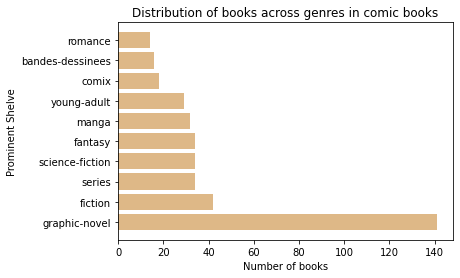

In [11]:
plt.barh(books_com_shel_top10['genre'], books_com_shel_top10['n_books'], color = 'burlywood')
plt.xlabel("Number of books")
plt.ylabel("Prominent Shelve")
plt.title("Distribution of books across genres in comic books")
#plt.xticks([1,2,3,4,5,6,7,8,9,10], labels)
plt.show()

In [12]:
books_com_shel_top10

,genre,n_books
107,graphic-novel,141
94,fiction,42
216,series,34
211,science-fiction,34
87,fantasy,34
149,manga,32
270,young-adult,29
52,comix,18
26,bandes-dessinees,16
204,romance,14


##### EDA 3 - Popular books

In [13]:
#Filtering for read books

interactions_read = interactions_comic[interactions_comic['is_read'] == True]

In [14]:
interactions_read.shape

(1588897, 12)

In [15]:
#Finding number of readers per book to find popularity

int_book_read_1 = interactions_read[['user_id', 'book_id']].groupby(['book_id'])['user_id'].count()
int_book_read_2 = int_book_read_1.to_frame().rename(columns = {'user_id':'n_readers'})
int_book_read_2.reset_index(inplace = True)
int_book_read_2.shape

(1000, 2)

In [16]:
int_book_read_2

,book_id,n_readers
0,866,1025
1,868,1468
2,869,1038
3,870,6000
4,871,1247
...,...,...
995,29772863,2140
996,30754980,1574
997,31145178,744
998,31338724,2198


In [17]:
#Merge book data with user interation data 

int_book_read =  pd.merge(int_book_read_2, books_comic[['book_id', 'title']], how = "inner", on = ['book_id'])

In [18]:
#Find top 10 most popular books

int_book_read_1 = int_book_read.sort_values(by = ['n_readers'], ascending = False)

In [19]:
int_book_read_2 = int_book_read_1.head(10)

In [20]:
int_book_read_2

,book_id,n_readers,title
828,15704307,17689,"Saga, Vol. 1 (Saga, #1)"
11,5805,16074,V for Vendetta
39,15196,15836,Maus I: A Survivor's Tale: My Father Bleeds Hi...
15,9516,14677,Persepolis: The Story of a Childhood (Persepol...
81,23754,13326,Preludes & Nocturnes (The Sandman #1)
853,17131869,12588,"Saga, Vol. 2 (Saga, #2)"
871,17571564,12225,"Hyperbole and a Half: Unfortunate Situations, ..."
904,19358975,10739,"Saga, Vol. 3 (Saga, #3)"
24,13615,10104,"Death Note, Vol. 1: Boredom (Death Note, #1)"
104,29800,10055,"Scott Pilgrim, Volume 1: Scott Pilgrim's Preci..."


In [21]:
int_book_read_2['title_1'] = int_book_read_2['title'].str.split('(').str[0]

<ipython-input-21-f2ca443668df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_book_read_2['title_1'] = int_book_read_2['title'].str.split('(').str[0]


In [22]:
int_book_read_2['title_2'] = np.where(int_book_read_2['book_id'] == 17571564, int_book_read_2['title_1'].str.split(',').str[0], int_book_read_2['title_1'])

<ipython-input-22-d55e396e98e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_book_read_2['title_2'] = np.where(int_book_read_2['book_id'] == 17571564, int_book_read_2['title_1'].str.split(',').str[0], int_book_read_2['title_1'])


In [23]:
int_book_read_2['title_3'] = np.where(int_book_read_2['book_id'] == 29800, int_book_read_2['title_2'].str.split(':').str[0], int_book_read_2['title_2'])

<ipython-input-23-aaf18c0e8301>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_book_read_2['title_3'] = np.where(int_book_read_2['book_id'] == 29800, int_book_read_2['title_2'].str.split(':').str[0], int_book_read_2['title_2'])


In [85]:
int_book_read_2['title_4'] = np.where(int_book_read_2['book_id'] == 15196, int_book_read_2['title_3'].str.split('My').str[0], int_book_read_2['title_3'])

<ipython-input-85-c13cad357567>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_book_read_2['title_4'] = np.where(int_book_read_2['book_id'] == 15196, int_book_read_2['title_3'].str.split('My').str[0], int_book_read_2['title_3'])


In [87]:
int_book_read_2['title_5'] = np.where(int_book_read_2['book_id'] == 17571564, int_book_read_2['title_4'].str.split('Un').str[0], int_book_read_2['title_4'])

<ipython-input-87-7fa5be3f2653>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_book_read_2['title_5'] = np.where(int_book_read_2['book_id'] == 17571564, int_book_read_2['title_4'].str.split('Un').str[0], int_book_read_2['title_4'])


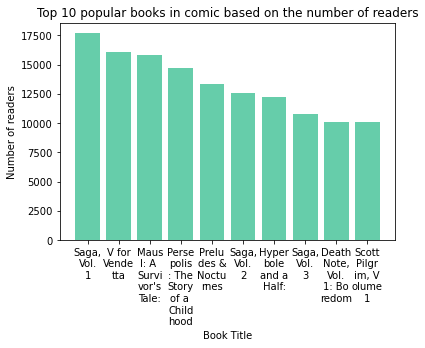

In [88]:
plt.bar(int_book_read_2['title_5'], int_book_read_2['n_readers'], color = 'mediumaquamarine')
labels = ['\n'.join(wrap(x, 5)) for x in  int_book_read_2['title_5']]
plt.xlabel("Book Title")
plt.ylabel("Number of readers")
plt.title("Top 10 popular books in comic based on the number of readers")
plt.xticks([0,1,2,3,4,5,6,7,8,9], labels)
plt.show()

In [80]:
int_book_read_2

,book_id,n_readers,title,title_1,title_2,title_3
828,15704307,17689,"Saga, Vol. 1 (Saga, #1)","Saga, Vol. 1","Saga, Vol. 1","Saga, Vol. 1"
11,5805,16074,V for Vendetta,V for Vendetta,V for Vendetta,V for Vendetta
39,15196,15836,Maus I: A Survivor's Tale: My Father Bleeds Hi...,Maus I: A Survivor's Tale: My Father Bleeds Hi...,Maus I: A Survivor's Tale: My Father Bleeds Hi...,Maus I: A Survivor's Tale: My Father Bleeds Hi...
15,9516,14677,Persepolis: The Story of a Childhood (Persepol...,Persepolis: The Story of a Childhood,Persepolis: The Story of a Childhood,Persepolis: The Story of a Childhood
81,23754,13326,Preludes & Nocturnes (The Sandman #1),Preludes & Nocturnes,Preludes & Nocturnes,Preludes & Nocturnes
853,17131869,12588,"Saga, Vol. 2 (Saga, #2)","Saga, Vol. 2","Saga, Vol. 2","Saga, Vol. 2"
871,17571564,12225,"Hyperbole and a Half: Unfortunate Situations, ...","Hyperbole and a Half: Unfortunate Situations, ...",Hyperbole and a Half: Unfortunate Situations,Hyperbole and a Half: Unfortunate Situations
904,19358975,10739,"Saga, Vol. 3 (Saga, #3)","Saga, Vol. 3","Saga, Vol. 3","Saga, Vol. 3"
24,13615,10104,"Death Note, Vol. 1: Boredom (Death Note, #1)","Death Note, Vol. 1: Boredom","Death Note, Vol. 1: Boredom","Death Note, Vol. 1: Boredom"
104,29800,10055,"Scott Pilgrim, Volume 1: Scott Pilgrim's Preci...","Scott Pilgrim, Volume 1: Scott Pilgrim's Preci...","Scott Pilgrim, Volume 1: Scott Pilgrim's Preci...","Scott Pilgrim, Volume 1"


##### EDA 4 - Ratings Vs Readers

In [25]:
interactions_comic_fil = interactions_comic[interactions_comic['rating'] != 0]

In [26]:
book_rati = interactions_comic_fil[['book_id', 'rating']].groupby(['book_id'])['rating'].mean()
book_rati = book_rati.to_frame().rename(columns = {'rating':'avg_rating_calc'})
book_rati.reset_index(inplace = True)
book_rati.shape

(1000, 2)

In [27]:
conditions = [
    (book_rati['avg_rating_calc'] <= 2),
    (book_rati['avg_rating_calc'] > 2) & (book_rati['avg_rating_calc'] <= 3),
    (book_rati['avg_rating_calc'] > 3) & (book_rati['avg_rating_calc'] <= 4), 
    (book_rati['avg_rating_calc'] > 4) & (book_rati['avg_rating_calc'] <= 5),
    ]

In [28]:
values = ['1-2', '2-3', '3-4', '4-5']

In [29]:
book_rati['rating_range'] = np.select(conditions, values)

In [30]:
interactions_read = interactions_comic[interactions_comic['is_read'] == True]

In [31]:
#Merge book data with user interation data 

user_b =  pd.merge(interactions_read[['user_id', 'book_id']], book_rati[['book_id', 'rating_range']], how = "left", on = ['book_id'])

In [32]:
user_b.shape

(1588897, 3)

In [33]:
user_b_1 = user_b[['user_id', 'book_id', 'rating_range']].groupby(['book_id', 'rating_range'])['user_id'].count() 
user_b_1 = user_b_1.to_frame().rename(columns = {'user_id':'n_readers'})
user_b_1.reset_index(inplace = True)
user_b_1.shape

(1000, 3)

In [34]:
user_b_1

,book_id,rating_range,n_readers
0,866,4-5,1025
1,868,4-5,1468
2,869,4-5,1038
3,870,4-5,6000
4,871,4-5,1247
...,...,...,...
995,29772863,4-5,2140
996,30754980,4-5,1574
997,31145178,4-5,744
998,31338724,4-5,2198


In [35]:
user_b_2 = user_b_1[['n_readers', 'rating_range']].groupby(['rating_range'])['n_readers'].mean() 
user_b_2 = user_b_2.to_frame().rename(columns = {'n_readers':'readers_per_book'})
user_b_2.reset_index(inplace = True)
user_b_2.shape

(3, 2)

In [36]:
user_b_2

,rating_range,readers_per_book
0,2-3,541.000000
1,3-4,1194.669014
2,4-5,1746.951049


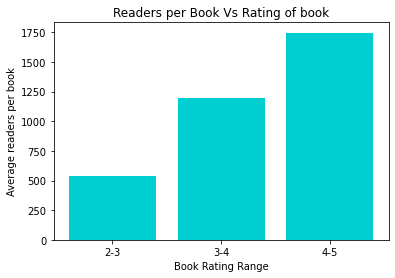

In [37]:
plt.bar(user_b_2['rating_range'], user_b_2['readers_per_book'], color = 'darkturquoise')
plt.xlabel("Book Rating Range")
plt.ylabel("Average readers per book")
plt.title("Readers per Book Vs Rating of book")
plt.show()

##### EDA 5 - Readers per book and number of book pages

In [38]:
#Merge book data with user interation data 

reader_pag =  pd.merge(interactions_read[['user_id', 'book_id']], books_comic[['book_id', 'num_pages']], how = "left", on = ['book_id'])

In [39]:
reader_pag = reader_pag[~reader_pag['num_pages'].isnull()]

In [40]:
reader_pag_1 = reader_pag[['user_id', 'book_id', 'num_pages']].groupby(['book_id', 'num_pages'])['user_id'].count() 
reader_pag_1 = reader_pag_1.to_frame().rename(columns = {'user_id':'n_readers'})
reader_pag_1.reset_index(inplace = True)
reader_pag_1.shape

(911, 3)

In [41]:
reader_pag_1['num_pages'].min()

24.0

In [42]:
reader_pag_1['num_pages'].max()

1440.0

In [43]:
conditions = [
    (reader_pag_1['num_pages'] <= 150),
    (reader_pag_1['num_pages'] > 150) & (reader_pag_1['num_pages'] <= 300),
    (reader_pag_1['num_pages'] > 300) & (reader_pag_1['num_pages'] <= 450), 
    (reader_pag_1['num_pages'] > 450) & (reader_pag_1['num_pages'] <= 600),
    (reader_pag_1['num_pages'] > 600) & (reader_pag_1['num_pages'] <= 750),
    (reader_pag_1['num_pages'] > 750) & (reader_pag_1['num_pages'] <= 900),
    (reader_pag_1['num_pages'] > 900) & (reader_pag_1['num_pages'] <= 1050),
    (reader_pag_1['num_pages'] > 1050) & (reader_pag_1['num_pages'] <= 1200),
    (reader_pag_1['num_pages'] > 1200) & (reader_pag_1['num_pages'] <= 1350),
    (reader_pag_1['num_pages'] > 1350) & (reader_pag_1['num_pages'] <= 1500),
    ]

In [44]:
values = ['1-150', '150-300', '300-450', '450-600', '600-750', '750-900', '900-1050', '1050-1200', '1200-1350', '1350-1500']

In [45]:
values1 = [1,2,3,4,5,6,7,8,9,10]

In [46]:
reader_pag_1['num_pages_range'] = np.select(conditions, values)

In [47]:
reader_pag_1['order'] = np.select(conditions, values1)

In [48]:
reader_pag_2 = reader_pag_1[['n_readers', 'num_pages_range', 'order']].groupby(['num_pages_range', 'order'])['n_readers'].mean() 
reader_pag_2 = reader_pag_2.to_frame().rename(columns = {'n_readers':'readers_per_book'})
reader_pag_2.reset_index(inplace = True)
reader_pag_2.shape

(8, 3)

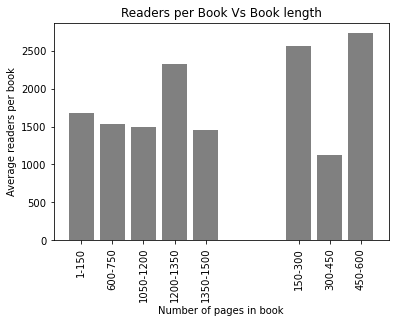

In [49]:
plt.bar(reader_pag_2['order'], reader_pag_2['readers_per_book'], color = 'gray')
plt.xlabel("Number of pages in book")
plt.ylabel("Average readers per book")
plt.xticks(reader_pag_2['order'], labels = ['1-150', '150-300', '300-450', '450-600', '600-750', '1050-1200', '1200-1350', '1350-1500'], rotation = 90)
plt.title("Readers per Book Vs Book length")
plt.show()

##### EDA 6 - Number of reviews in each shelve

In [89]:
books_genre_sub =  pd.merge(books_comic[['book_id', 'genre']], books_com_shel_top10[['genre', 'n_books']], how = "inner", on = ['genre'])

In [90]:
## FOR BOOK READ

In [91]:
#Merge book data with user interation data 

book_reviews =  pd.merge(interactions_read[['user_id', 'book_id', 'review_id']], books_genre_sub[['book_id', 'genre', 'n_books']], how = "inner", on = ['book_id'])

In [92]:
book_reviews_1 = book_reviews[['review_id', 'genre', 'n_books']].groupby(['genre', 'n_books'])['review_id'].count() 
book_reviews_1 = book_reviews_1.to_frame().rename(columns = {'review_id':'n_reviews'})
book_reviews_1.reset_index(inplace = True)
book_reviews_1.shape

(10, 3)

In [93]:
book_reviews_1

,genre,n_books,n_reviews
0,bandes-dessinees,16,23306
1,comix,18,41008
2,fantasy,34,49321
3,fiction,42,73158
4,graphic-novel,141,211112
5,manga,32,35727
6,romance,14,16215
7,science-fiction,34,51234
8,series,34,47440
9,young-adult,29,56120


In [94]:
## FOR BOOKS NOT READ

In [95]:
interactions_unread = interactions_comic[interactions_comic['is_read'] == False]

In [96]:
book_reviews_un =  pd.merge(interactions_unread[['user_id', 'book_id', 'review_id']], books_genre_sub[['book_id', 'genre', 'n_books']], how = "inner", on = ['book_id'])

In [97]:
book_reviews_2 = book_reviews_un[['review_id', 'genre', 'n_books']].groupby(['genre', 'n_books'])['review_id'].count() 
book_reviews_2 = book_reviews_2.to_frame().rename(columns = {'review_id':'n_reviews'})
book_reviews_2.reset_index(inplace = True)
book_reviews_2.shape

(10, 3)

In [98]:
book_reviews_2

,genre,n_books,n_reviews
0,bandes-dessinees,16,6846
1,comix,18,25360
2,fantasy,34,27678
3,fiction,42,37759
4,graphic-novel,141,116992
5,manga,32,12820
6,romance,14,13702
7,science-fiction,34,23619
8,series,34,17098
9,young-adult,29,28016


In [99]:
book_reviews_1 = book_reviews_1.sort_values(by = ['n_books'], axis = 0, ascending = False, inplace = False)
book_reviews_2 = book_reviews_2.sort_values(by = ['n_books'], axis = 0, ascending = False, inplace = False)

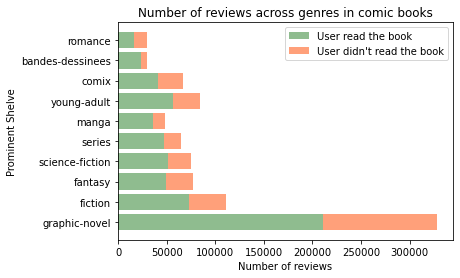

In [100]:
a = plt.barh(book_reviews_1['genre'], book_reviews_1['n_reviews'], color = 'darkseagreen')
b = plt.barh(book_reviews_2['genre'], book_reviews_2['n_reviews'], left = book_reviews_1['n_reviews'], color = 'lightsalmon')

plt.legend([a, b], ["User read the book", "User didn't read the book"], loc = "upper right")


plt.xlabel("Number of reviews")
plt.ylabel("Prominent Shelve")
#plt.xticks(reader_pag_2['order'], labels = ['1-150', '150-300', '300-450', '450-600', '600-750', '1050-1200', '1200-1350', '1350-1500'], rotation = 90)
plt.title("Number of reviews across genres in comic books")
plt.show()